# Desafio da Sprint 3

## Importando e normalizando dados

##### Importando bibliotecas e arquivo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('googleplaystore.csv')
dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


##### Normalizando os dados

In [2]:
ds = dataset.copy()
ds = ds.drop_duplicates(keep='first')
ds = ds.fillna(0)

ds['Installs'] = ds['Installs'].str.replace('[+,]', '', regex=True).replace('Free', 0)
ds['Installs'] = pd.to_numeric(ds['Installs'], errors='coerce')
ds['Reviews'] = pd.to_numeric(ds['Reviews'], errors='coerce')
ds['Price'] = ds['Price'].str.replace('$', '', regex=False)
ds['Price'] = pd.to_numeric(ds['Price'], errors='coerce')

ds = ds.sort_values(by='Installs', ascending=False)
ds

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5856,Google Play Games,FAMILY,4.3,7168735.0,Varies with device,1000000000,Free,0.00,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device
4098,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9231613.0,Varies with device,1000000000,Free,0.00,Everyone,Travel & Local,"July 31, 2018",Varies with device,Varies with device
4150,Google,TOOLS,4.4,8021623.0,Varies with device,1000000000,Free,0.00,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device
3943,Facebook,SOCIAL,4.1,78128208.0,Varies with device,1000000000,Free,0.00,Teen,Social,"August 3, 2018",Varies with device,Varies with device
4144,Google+,SOCIAL,4.2,4828372.0,Varies with device,1000000000,Free,0.00,Teen,Social,"July 26, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8614,Sweden Newspapers,NEWS_AND_MAGAZINES,0.0,0.0,2.1M,0,Free,0.00,Everyone,News & Magazines,"July 7, 2018",1.1,4.4 and up
9905,Eu sou Rico,FINANCE,0.0,0.0,2.6M,0,Paid,30.99,Everyone,Finance,"January 9, 2018",1.0,4.0 and up
9917,Eu Sou Rico,FINANCE,0.0,0.0,1.4M,0,Paid,394.99,Everyone,Finance,"July 11, 2018",1.0,4.0.3 and up
5945,Ain Arabic Kids Alif Ba ta,FAMILY,0.0,0.0,33M,0,Paid,2.99,Everyone,Education,"April 15, 2016",1.0,3.0 and up


## Desenvolvendo o desafio

##### Top 5 apps por número de instalações

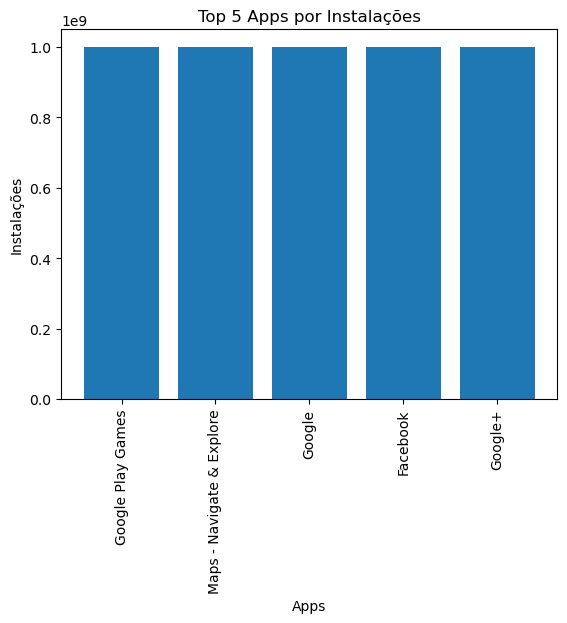

In [3]:
top5 = (
    ds.nlargest(5, 'Installs')
    [['App', 'Installs']]
        )
plt.bar(top5['App'], top5['Installs'])
plt.title('Top 5 Apps por Instalações')
plt.xlabel('Apps')
plt.ylabel('Instalações')
plt.xticks(rotation=90)
plt.show()

##### Gráfico de pizza das categorias

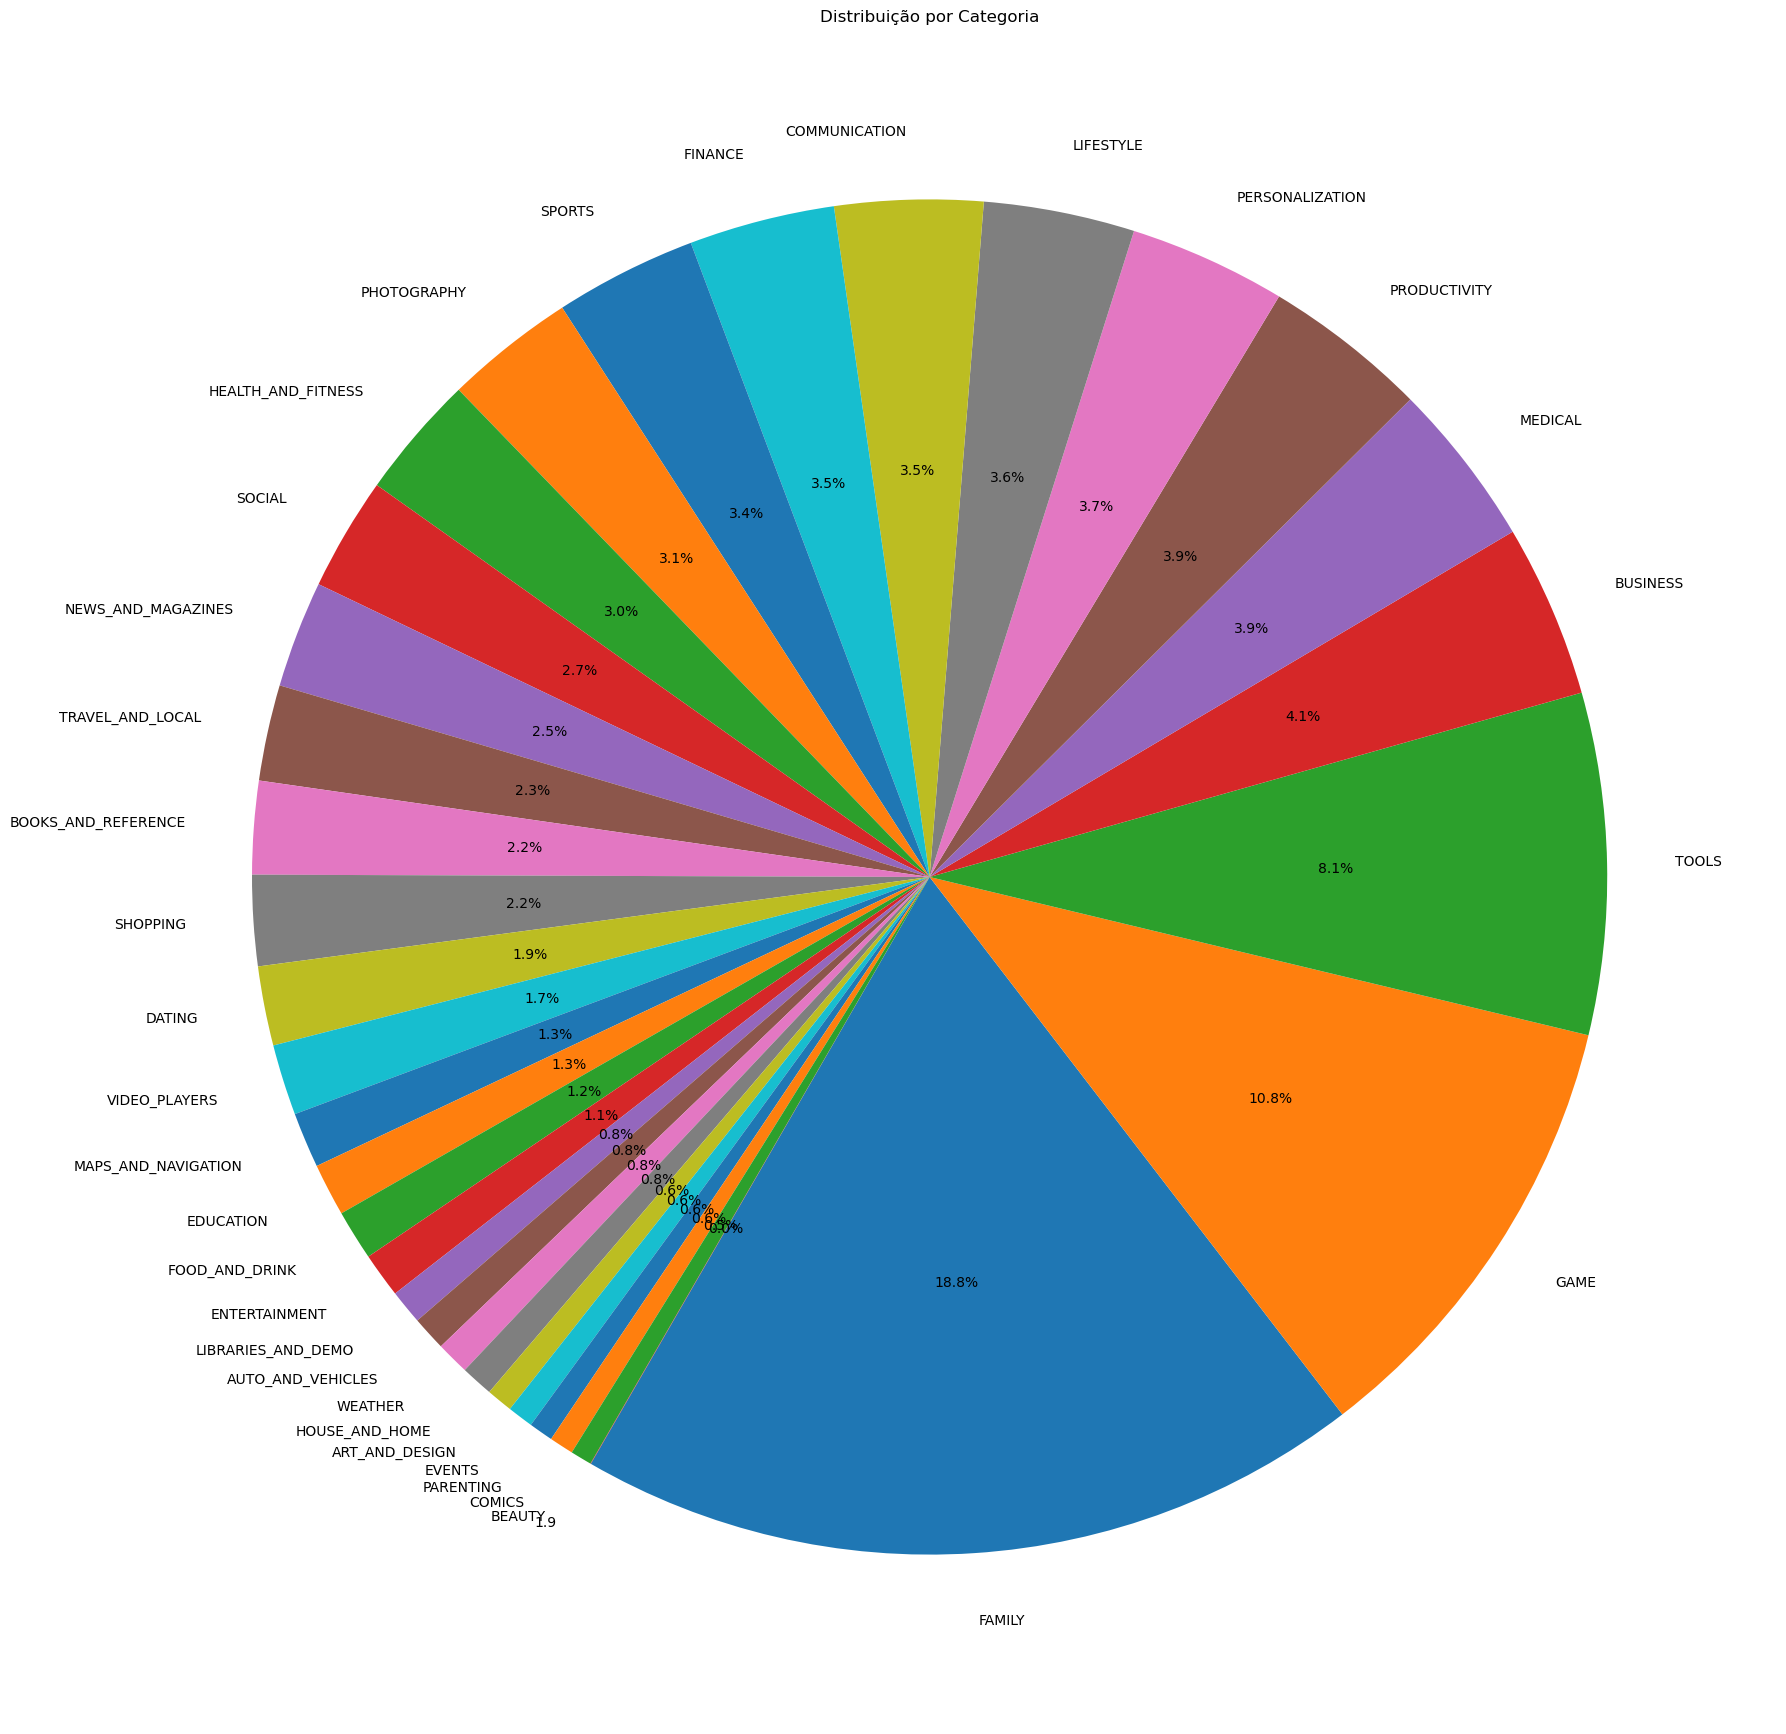

In [4]:
categoriaContagem = ds['Category'].value_counts()
plt.figure(figsize=(28,22))
plt.pie(categoriaContagem, labels=categoriaContagem.index, autopct='%1.1f%%', startangle=240)
plt.title('Distribuição por Categoria')
plt.show()

##### App mais caro

In [5]:
appCaro = ds.nlargest(1,'Price')
print("O app mais caro:",appCaro[['App','Price']])

O app mais caro:                            App  Price
4367  I'm Rich - Trump Edition  400.0


##### App classificados com "Mature 17+"

In [6]:
condicao = ds['Content Rating'] == 'Mature 17+'
appMature = ds[condicao]
print("O numero de apps 'Mature 17+':", len(appMature))

O numero de apps 'Mature 17+': 447


##### Top 10 app por reviews

In [7]:
top10 = (ds.nlargest(24, 'Reviews')[['App', 'Reviews']]
         .drop_duplicates(subset=['App'], keep='first')
         .reset_index(drop='index')
         )
top10

,App,Reviews
0,Facebook,78158306.0
1,WhatsApp Messenger,69119316.0
2,Instagram,66577446.0
3,Messenger – Text and Video Chat for Free,56646578.0
4,Clash of Clans,44893888.0
5,Clean Master- Space Cleaner & Antivirus,42916526.0
6,Subway Surfers,27725352.0
7,YouTube,25655305.0
8,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999.0
9,Clash Royale,23136735.0


##### Cálculos extras

Apps com Rating >= 4.5, ordenados por número de reviews

In [8]:

topApps = (ds[ds['Rating']>= 4.5].sort_values(by='Reviews', ascending=False)
            .drop_duplicates(['App'], keep='first')
            .reset_index(drop='index')
        )
topApps = topApps[['App', 'Rating', 'Reviews']].head(10)
topApps

,App,Rating,Reviews
0,Instagram,4.5,66577446.0
1,Clash of Clans,4.6,44893888.0
2,Clean Master- Space Cleaner & Antivirus,4.7,42916526.0
3,Subway Surfers,4.5,27725352.0
4,"Security Master - Antivirus, VPN, AppLock, Boo...",4.7,24900999.0
5,Clash Royale,4.6,23136735.0
6,UC Browser - Fast Download Private & Secure,4.5,17714850.0
7,"360 Security - Free Antivirus, Booster, Cleaner",4.6,16771865.0
8,My Talking Tom,4.5,14892469.0
9,8 Ball Pool,4.5,14201891.0


Soma total de instalações

In [9]:
totalInstalls = int(ds['Installs'].sum())
print(f"A soma de totas as instalações é {totalInstalls:,}")


A soma de totas as instalações é 146,631,914,527


##### Gráficos extras

Top 10 apps por Installs, gráfico de linha

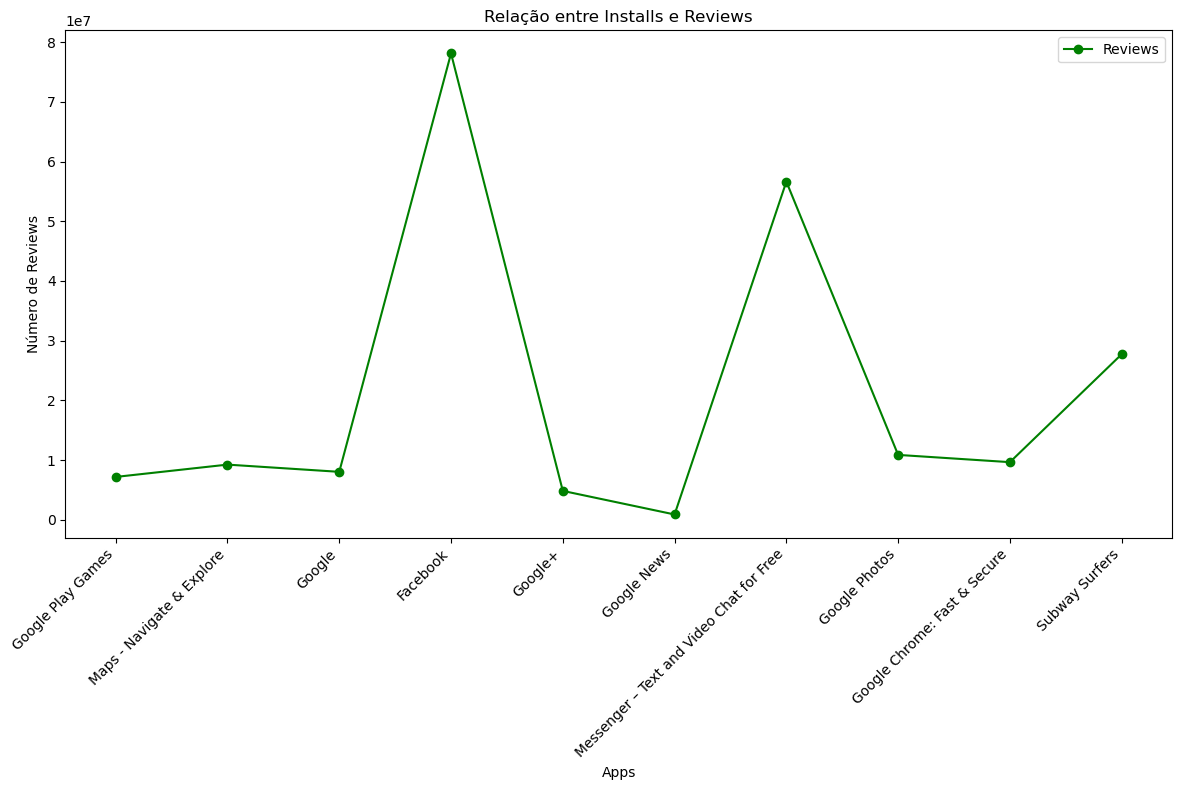

In [10]:
top10Installs = ds.nlargest(10,'Installs').reset_index(drop='index')

plt.figure(figsize=(12,8))
plt.plot(top10Installs['App'], top10Installs['Reviews'],
        marker='o', color='green',label='Reviews'
         )
plt.xticks(rotation=45, ha='right')
plt.title("Relação entre Installs e Reviews")
plt.xlabel('Apps')
plt.ylabel('Número de Reviews')
plt.legend()
plt.tight_layout()
plt.show()

Rating por Preço, gráfico de dimensão

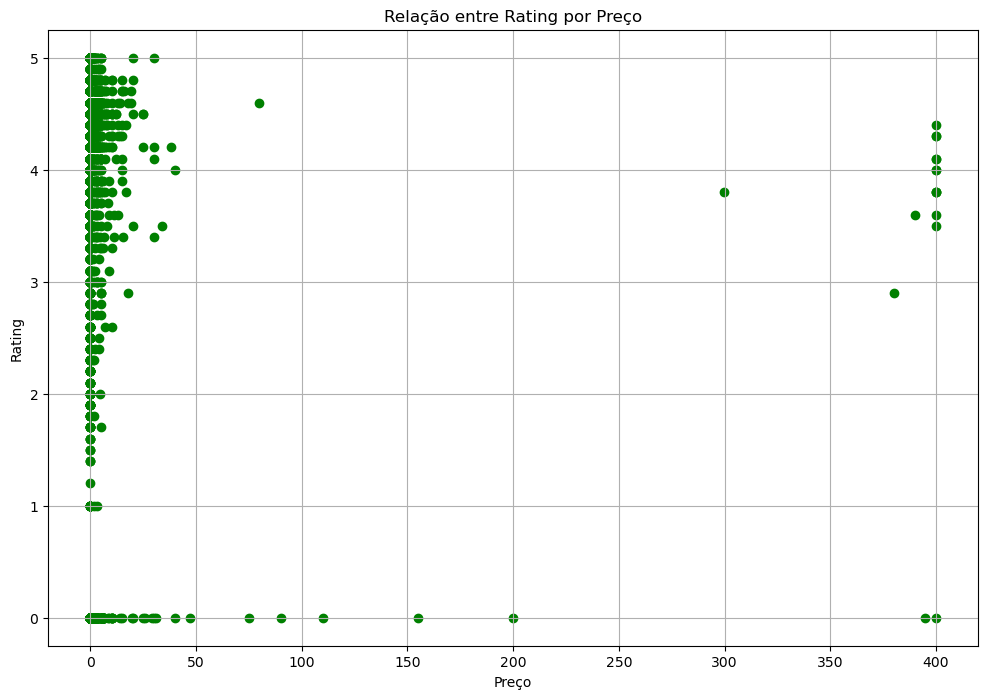

In [11]:
plt.figure(figsize=(12,8))
plt.scatter(ds['Price'], ds['Rating'], alpha=1, color='green')
plt.title("Relação entre Rating por Preço")
plt.xlabel("Preço")
plt.ylabel("Rating")
plt.grid(True)
plt.show()